In [1]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
plt.style.use('bmh')

jtplot.style()

import statsmodels.api as sm

In [4]:
df = pd.read_csv('./../data/Monsteruitslagen_Resultaten.csv')
df['datetime'] = pd.to_datetime(df.datum + ' ' + df.tijd)

def convert_tappunt(x):
    x = str(x).lower()
    if 'thermostatische douchemengkraan' in x or 'therm.' in x:
        return 'douche'
    if 'douche' in x:
        return 'douche'
    if '1e tappunt' in x:
        return '1e tappunt'
    return 'overige'

def convert_ruimte(x):
    x = str(x).lower()
    if 'kelder' in x:
        return 'kelder'
    if 'kamer' in x:
        return 'kamer'
    if 'appartement' in x:
        return 'appartement'
    if 'technische ruimte' in x:
        return 'technische ruimte'
    if 'kapsalon' in x:
        return 'kapsalon'
    return 'overige'
    
df['tappunt_simple'] = df.tappunt.apply(convert_tappunt)
df['ruimte_simple'] = df.ruimte.apply(convert_ruimte)
df['location_is_Noorderkroon'] = df.locatienaam.str.contains('Noorderkroon')

df_tmp = df[df.component == 'Totaal Legionella spp'].copy()
df_tmp.resultaat = df_tmp.resultaat.str.replace('<100', '0').astype(int)
df_tmp.resultaat.groupby(pd.qcut(df_tmp.tempvoor, 4)).describe()

def get_level(x):
    for i in [0,1,2,3,4]:
        if '{}.'.format(i) in x:
            return i
    return -1
    
df_tmp['app_level'] = df_tmp.ruimte.apply(get_level)
df_tmp['resultaat_bin'] = (df_tmp.resultaat > 0).astype(int)

In [5]:
df_tmp['resultaat_bin'] .groupby(df_tmp.location_is_Noorderkroon).describe()

,count,mean,std,min,25%,50%,75%,max
location_is_Noorderkroon,,,,,,,,
False,219.0,0.178082,0.383458,0.0,0.0,0.0,0.0,1.0
True,242.0,0.429752,0.496067,0.0,0.0,0.0,1.0,1.0


In [10]:
df_tmp['resultaat'] .groupby(df_tmp.location_is_Noorderkroon).describe()

,count,mean,std,min,25%,50%,75%,max
location_is_Noorderkroon,,,,,,,,
False,219.0,931.96347,5942.282118,0.0,0.0,0.0,0.0,79000.0
True,242.0,578.92562,1917.145311,0.0,0.0,0.0,275.0,14400.0


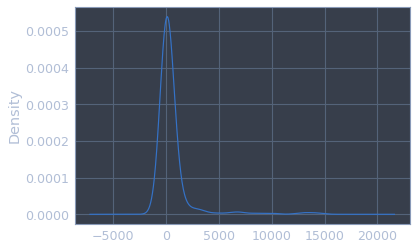

In [12]:
df_tmp[df_tmp.location_is_Noorderkroon].resultaat.plot.kde()

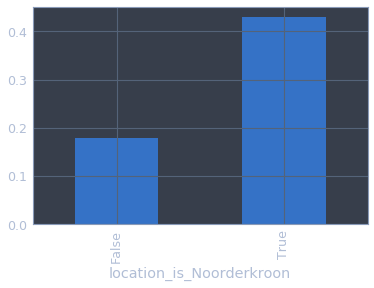

In [21]:
df_tmp['resultaat_bin'].groupby(df_tmp.location_is_Noorderkroon).mean().plot.bar()